In [2]:
!pip install interpret
!pip install lime
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 630.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 10.2 MB/s eta 0:00:00
  Created 

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [4]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ML_Labs/ML_Project/diabetes.csv')

In [5]:
diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [7]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [9]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Separating the data and labels

In [10]:
X = diabetes_dataset.drop(columns= 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

#Data Standardization

In [11]:
scaler = StandardScaler()

In [12]:
standardized_data = scaler.fit_transform(X)

In [13]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=42)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report
from sklearn.model_selection import learning_curve, validation_curve

class ModelEvaluator:
    def __init__(self, model, X_train, X_test, y_train, y_test):
        """
        Initialize the ModelEvaluator with the model and datasets.
        """
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.y_pred = None

    def train_and_predict(self):
        """
        Train the model and make predictions.
        """
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)

    def get_metrics(self):
        """
        Calculate and print accuracy, recall, precision, and F1-score.
        """
        if self.y_pred is None:
            print("Model is not trained yet! Please call `train_and_predict` first.")
            return

        accuracy = accuracy_score(self.y_test, self.y_pred)
        recall = recall_score(self.y_test, self.y_pred, average='binary')  # Use 'macro' or 'weighted' for multiclass
        f1 = f1_score(self.y_test, self.y_pred, average='binary')
        precision = precision_score(self.y_test, self.y_pred, average='binary')

        print(f"Accuracy: {accuracy}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"Precision: {precision}")
        print("\nClassification Report:")
        print(classification_report(self.y_test, self.y_pred))

    def plot_learning_curve(self, scoring='accuracy', cv=5):
        """
        Plot the learning curve for the model to visualize bias-variance tradeoff.
        """
        train_sizes, train_scores, test_scores = learning_curve(self.model, self.X_train, self.y_train, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
        plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="green")

        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

        plt.title("Learning Curve")
        plt.xlabel("Training Set Size")
        plt.ylabel(scoring.capitalize())
        plt.legend(loc="best")
        plt.show()

    def plot_validation_curve(self, param_name, param_range, scoring='accuracy', cv=5):
        """
        Plot the validation curve for the model to visualize bias-variance tradeoff for a specific hyperparameter.
        """
        train_scores, test_scores = validation_curve(self.model, self.X_train, self.y_train, param_name=param_name, param_range=param_range, cv=cv, scoring=scoring, n_jobs=-1)

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(param_range, train_mean, label="Training Score", color="blue")
        plt.plot(param_range, test_mean, label="Cross-validation Score", color="green")

        plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
        plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

        plt.title(f"Validation Curve for {param_name}")
        plt.xlabel(param_name)
        plt.ylabel(scoring.capitalize())
        plt.legend(loc="best")
        plt.xscale('log')
        plt.show()


In [16]:
###################################################################################################################################################################

# ExplainableBoostingClassifier

In [17]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

In [18]:
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, Y_train)

ExplainableBoostingClassifier()

In [19]:

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, ebm.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))

AUC: 0.830


In [20]:
show(ebm.explain_global())

In [21]:
show(ebm.explain_local(X_test, Y_test),0)

Accuracy: 0.7597402597402597
Recall: 0.6296296296296297
F1 Score: 0.6476190476190476
Precision: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



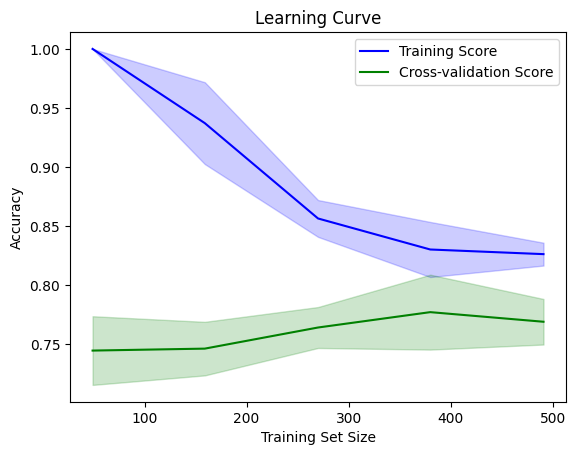

In [22]:
evaluator = ModelEvaluator(ebm, X_train, X_test, Y_train, Y_test)
evaluator.train_and_predict()  # Train the model and get predictions
evaluator.get_metrics()        # Get the classification metrics

# Plot the learning curve
evaluator.plot_learning_curve()


In [23]:
################################################################################################################################################################

# Local Interpretable Model-agnostic Explanations (LIME)

In [24]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import LimeTabular

In [25]:
seed = 42
np.random.seed(seed)

pca = PCA()
rf = RandomForestClassifier(random_state=seed)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, Y_train)

Pipeline(steps=[('pca', PCA()),
                ('rf', RandomForestClassifier(random_state=42))])

In [26]:
lime = LimeTabular(blackbox_model, X_train)

Accuracy: 0.7272727272727273
Recall: 0.5740740740740741
F1 Score: 0.5961538461538461
Precision: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.62      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



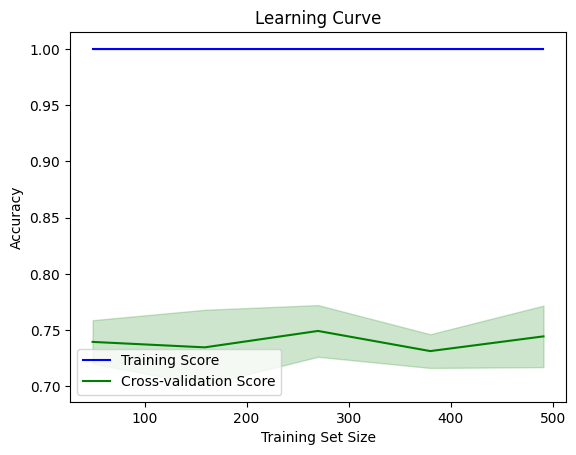

In [27]:
evaluator = ModelEvaluator(blackbox_model, X_train, X_test, Y_train, Y_test)
evaluator.train_and_predict()  # Train the model and get predictions
evaluator.get_metrics()        # Get the classification metrics

# Plot the learning curve
evaluator.plot_learning_curve()


In [28]:
show(lime.explain_local(X_test[:5], Y_test[:5]), 0)

In [29]:
#########################################################################################################################################################################################

# Classification Tree

In [30]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from interpret.glassbox import ClassificationTree
from interpret import show

seed = 42
np.random.seed(seed)


In [31]:

dt = ClassificationTree(random_state=seed)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)


In [32]:

auc = roc_auc_score(Y_test, dt.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))

AUC: 0.788


In [33]:
show(dt.explain_global())

In [34]:
evaluator = ModelEvaluator(dt, X_train, X_test, Y_train, Y_test)
evaluator.train_and_predict()  # Train the model and get predictions
evaluator.get_metrics()        # Get the classification metrics


Accuracy: 0.6948051948051948
Recall: 0.25925925925925924
F1 Score: 0.37333333333333335
Precision: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       100
           1       0.67      0.26      0.37        54

    accuracy                           0.69       154
   macro avg       0.68      0.59      0.59       154
weighted avg       0.69      0.69      0.65       154



In [35]:
#######################################################################################################################################################################################

# SHAP

(Blackbox model)

In [36]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import ShapKernel

In [37]:
seed = 42
np.random.seed(seed)

pca = PCA()
rf = RandomForestClassifier(random_state=seed)

In [38]:
blackbox_model_shap = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model_shap.fit(X_train, Y_train)

Pipeline(steps=[('pca', PCA()),
                ('rf', RandomForestClassifier(random_state=42))])

In [39]:
shap = ShapKernel(blackbox_model_shap, X_train)
shap_local = shap.explain_local(X_test[:5], Y_test[:5])

  0%|          | 0/5 [00:00<?, ?it/s]

In [40]:
show(shap_local, 0)

Accuracy: 0.7272727272727273
Recall: 0.5740740740740741
F1 Score: 0.5961538461538461
Precision: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.62      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



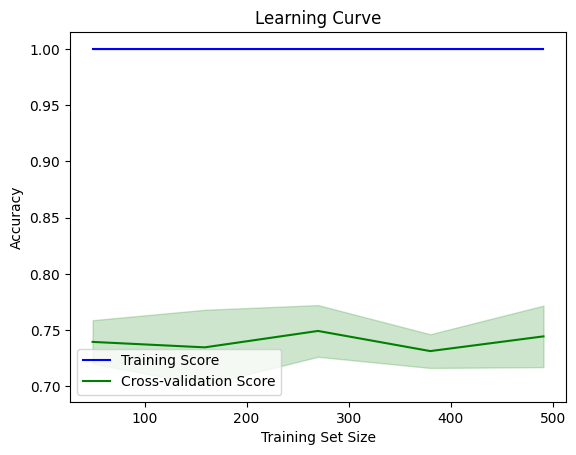

In [41]:
evaluator = ModelEvaluator(blackbox_model_shap, X_train, X_test, Y_train, Y_test)
evaluator.train_and_predict()  # Train the model and get predictions
evaluator.get_metrics()        # Get the classification metrics

# Plot the learning curve
evaluator.plot_learning_curve()

In [42]:
###########################################################################################################################################################################

# Linear Model

In [43]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from interpret.glassbox import LogisticRegression
from interpret import show


In [44]:
seed = 42
np.random.seed(seed)
lr = LogisticRegression(max_iter=3000, random_state=seed)
lr.fit(X_train, Y_train)

In [45]:
auc = roc_auc_score(Y_test, lr.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))

AUC: 0.823


In [46]:
evaluator = ModelEvaluator(lr, X_train, X_test, Y_train, Y_test)
evaluator.train_and_predict()  # Train the model and get predictions
evaluator.get_metrics()        # Get the classification metrics


Accuracy: 0.7142857142857143
Recall: 0.5185185185185185
F1 Score: 0.56
Precision: 0.6086956521739131

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [47]:
show(lr.explain_global())


In [48]:
import pickle
filename = "Diabetes_model.sav"
pickle.dump(ebm,open(filename,"wb"))